In [61]:
# importando bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [77]:
# lendo a base de dados

df = pd.read_csv('/content/olimpiadasparis2024.csv')
df.head()

,code,name,name_short,name_tv,gender,function,country_code,country,country_full,nationality,nationality_full,nationality_code,height,weight,disciplines,events,birth_date
0,1535420,VALENCIA Alejandra,VALENCIA A,Alejandra VALENCIA,Female,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,0,0.0,['Archery'],"[""Women's Individual"", ""Women's Team"", 'Mixed ...",1994-10-17
1,1535429,RUIZ Angela,RUIZ A,Angela RUIZ,Female,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,0,0.0,['Archery'],"[""Women's Individual"", ""Women's Team""]",2006-07-28
2,1535430,GRANDE Matias,GRANDE M,Matias GRANDE,Male,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,0,0.0,['Archery'],"[""Men's Individual"", ""Men's Team"", 'Mixed Team']",2004-04-26
3,1536460,ROJAS Carlos,ROJAS C,Carlos ROJAS,Male,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,0,0.0,['Archery'],"[""Men's Individual"", ""Men's Team""]",2000-01-14
4,1536467,MARTINEZ WING Bruno,MARTINEZ WING B,Bruno MARTINEZ WING,Male,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,0,0.0,['Archery'],"[""Men's Individual"", ""Men's Team""]",1998-03-08


In [78]:
# Total de atletas por categorias
import ast

df['disciplines'] = df['disciplines'].apply(ast.literal_eval)
df = df.explode('disciplines')
df.groupby('disciplines').agg({'code':'count'}).sort_values(by='code', ascending=False).head(10)


,code
disciplines,
Athletics,2023
Swimming,853
Football,553
Rowing,493
Hockey,415
Handball,386
Judo,378
Shooting,342
Sailing,330


In [79]:
# total de linhas

total_linhas = df.shape[0]
print(f"Total de linhas: {total_linhas}")


Total de linhas: 11147


In [81]:
# informacões gerais da base
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 11147 entries, 0 to 11114
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   code              11147 non-null  int64  
 1   name              11147 non-null  object 
 2   name_short        11147 non-null  object 
 3   name_tv           11147 non-null  object 
 4   gender            11147 non-null  object 
 5   function          11147 non-null  object 
 6   country_code      11147 non-null  object 
 7   country           11147 non-null  object 
 8   country_full      11147 non-null  object 
 9   nationality       11147 non-null  object 
 10  nationality_full  11147 non-null  object 
 11  nationality_code  11147 non-null  object 
 12  height            11147 non-null  int64  
 13  weight            11131 non-null  float64
 14  disciplines       11147 non-null  object 
 15  events            11147 non-null  object 
 16  birth_date        11147 non-null  object 
dty

In [82]:
# Nomes das colunas

# total de colunas -> 17

print(df.columns)

Index(['code', 'name', 'name_short', 'name_tv', 'gender', 'function',
       'country_code', 'country', 'country_full', 'nationality',
       'nationality_full', 'nationality_code', 'height', 'weight',
       'disciplines', 'events', 'birth_date'],
      dtype='object')


In [83]:
# tradução das colunas para portugues

translation_dict = {
    'code': 'código',
    'name': 'nome',
    'name_short': 'nome_curto',
    'name_tv': 'nome_tv',
    'gender': 'gênero',
    'function': 'função',
    'country_code': 'código_país',
    'country': 'país',
    'country_full': 'nome_completo_país',
    'nationality': 'nacionalidade',
    'nationality_full': 'nacionalidade_completa',
    'nationality_code': 'código_nacionalidade',
    'height': 'altura',
    'weight': 'peso',
    'disciplines': 'disciplinas',
    'events': 'eventos',
    'birth_date': 'data_nascimento'
}

df.rename(columns=translation_dict, inplace=True)

print(df.columns)
df.head()


Index(['código', 'nome', 'nome_curto', 'nome_tv', 'gênero', 'função',
       'código_país', 'país', 'nome_completo_país', 'nacionalidade',
       'nacionalidade_completa', 'código_nacionalidade', 'altura', 'peso',
       'disciplinas', 'eventos', 'data_nascimento'],
      dtype='object')


,código,nome,nome_curto,nome_tv,gênero,função,código_país,país,nome_completo_país,nacionalidade,nacionalidade_completa,código_nacionalidade,altura,peso,disciplinas,eventos,data_nascimento
0,1535420,VALENCIA Alejandra,VALENCIA A,Alejandra VALENCIA,Female,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,0,0.0,Archery,"[""Women's Individual"", ""Women's Team"", 'Mixed ...",1994-10-17
1,1535429,RUIZ Angela,RUIZ A,Angela RUIZ,Female,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,0,0.0,Archery,"[""Women's Individual"", ""Women's Team""]",2006-07-28
2,1535430,GRANDE Matias,GRANDE M,Matias GRANDE,Male,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,0,0.0,Archery,"[""Men's Individual"", ""Men's Team"", 'Mixed Team']",2004-04-26
3,1536460,ROJAS Carlos,ROJAS C,Carlos ROJAS,Male,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,0,0.0,Archery,"[""Men's Individual"", ""Men's Team""]",2000-01-14
4,1536467,MARTINEZ WING Bruno,MARTINEZ WING B,Bruno MARTINEZ WING,Male,Athlete,MEX,Mexico,Mexico,Mexico,Mexico,MEX,0,0.0,Archery,"[""Men's Individual"", ""Men's Team""]",1998-03-08


In [84]:
#total de países

print("Total de países participantes:", df['país'].nunique())

Total de países participantes: 206


In [85]:
# listando todos os países participantes

for pais in df['país'].unique():
    print(pais)

Mexico
IR Iran
Virgin Islands, US
Romania
France
Bhutan
Colombia
Bangladesh
India
Cuba
Germany
Chad
Kazakhstan
Austria
Great Britain
Uzbekistan
Vietnam
Spain
Chinese Taipei
Türkiye
Luxembourg
Ukraine
Puerto Rico
El Salvador
Mongolia
Guinea
Egypt
Japan
Malaysia
Czechia
Denmark
Republic of Moldova
Korea
Finland
Tunisia
Argentina
Slovakia
China
Indonesia
Italy
Australia
Estonia
Israel
Chile
South Africa
United States
Brazil
Poland
Canada
Azerbaijan
Netherlands
San Marino
Slovenia
Gambia
Comoros
Djibouti
Malawi
Singapore
Iraq
Ethiopia
Jamaica
St Kitts and Nevis
Congo
Saint Lucia
Ghana
Côte d'Ivoire
Bermuda
Guyana
Ireland
Sao Tome & Principe
Timor-Leste
Cambodia
Afghanistan
Lesotho
Gabon
Eswatini
Mali
Paraguay
Mozambique
Namibia
Uganda
Turkmenistan
Albania
Libya
Micronesia
Kosovo
Barbados
Mauritius
Monaco
Costa Rica
Morocco
Antigua and Barbuda
Senegal
Eritrea
Cyprus
Bolivia
Belize
Guinea-Bissau
Kiribati
Benin
Grenada
Cabo Verde
Fiji
Palau
Jordan
Guam
Qatar
Kyrgyzstan
Tajikistan
Virgin Islan

In [90]:
# Total de atletas

df.info()

print(f"\nTotal de {len(df['código'].unique())} participantes")

#Após o explode, tivemos um aumento de 32 linhas por conta de atletas que participaram de mais de uma modalidade

<class 'pandas.core.frame.DataFrame'>
Index: 11147 entries, 0 to 11114
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   código                  11147 non-null  int64  
 1   nome                    11147 non-null  object 
 2   nome_curto              11147 non-null  object 
 3   nome_tv                 11147 non-null  object 
 4   gênero                  11147 non-null  object 
 5   função                  11147 non-null  object 
 6   código_país             11147 non-null  object 
 7   país                    11147 non-null  object 
 8   nome_completo_país      11147 non-null  object 
 9   nacionalidade           11147 non-null  object 
 10  nacionalidade_completa  11147 non-null  object 
 11  código_nacionalidade    11147 non-null  object 
 12  altura                  11147 non-null  int64  
 13  peso                    11131 non-null  float64
 14  disciplinas             11147 non-null  obj

   gênero  count
0  Female   5475
1    Male   5672


<Axes: title={'center': 'Proporção de atletas por gênero'}, xlabel='gênero'>

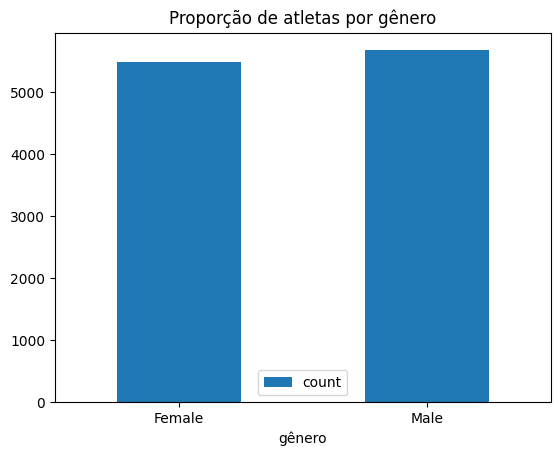

In [104]:
# Separação por gêneros

contagem_generos = df.groupby('gênero').size().reset_index(name='count')
print(contagem_generos)
contagem_generos.plot(kind='bar', x='gênero', rot=0, title='Proporção de atletas por gênero')


In [40]:
# TOP 10 países por atletas participantes

df.groupby('país').agg({'código':'count'}).sort_values(by='código', ascending=False).head(10)

,código
país,
United States,620
France,600
Australia,476
Germany,457
Japan,432
Spain,401
China,398
Italy,397
Great Britain,341


In [29]:
# Total de atletas do Brasil

print(df[df['país'] == 'Brazil'].shape[0])

290


In [31]:
# Total de atletas do Brasil divididos por categorias
brasil_df = df[df['país'] == 'Brazil']

atletas_por_disciplina = brasil_df.groupby('disciplinas')['nome'].count()
print(atletas_por_disciplina)

print(atletas_por_disciplina.sum())

disciplinas
Archery                   2
Artistic Gymnastics       7
Athletics                44
Badminton                 2
Basketball               12
Beach Volleyball          8
Boxing                   10
Canoe Slalom              2
Canoe Sprint              6
Cycling BMX Freestyle     1
Cycling BMX Racing        1
Cycling Mountain Bike     2
Cycling Road              2
Diving                    1
Equestrian                9
Fencing                   3
Football                 22
Handball                 17
Judo                     13
Marathon Swimming         2
Modern Pentathlon         1
Rhythmic Gymnastics       6
Rowing                    2
Rugby Sevens             14
Sailing                  12
Shooting                  3
Skateboarding            12
Surfing                   6
Swimming                 18
Table Tennis              6
Taekwondo                 4
Tennis                    5
Trampoline Gymnastics     2
Triathlon                 4
Volleyball               26
Weightli

In [32]:
# Total de atletas da Argentina

print(df[df['país'] == 'Argentina'].shape[0])

143


In [34]:
# Total de atletas dos Estados Unidos

print(df[df['país'] == 'United States'].shape[0])

620


In [35]:
# Total de atletas do Peru

print(df[df['país'] == 'Peru'].shape[0])

26


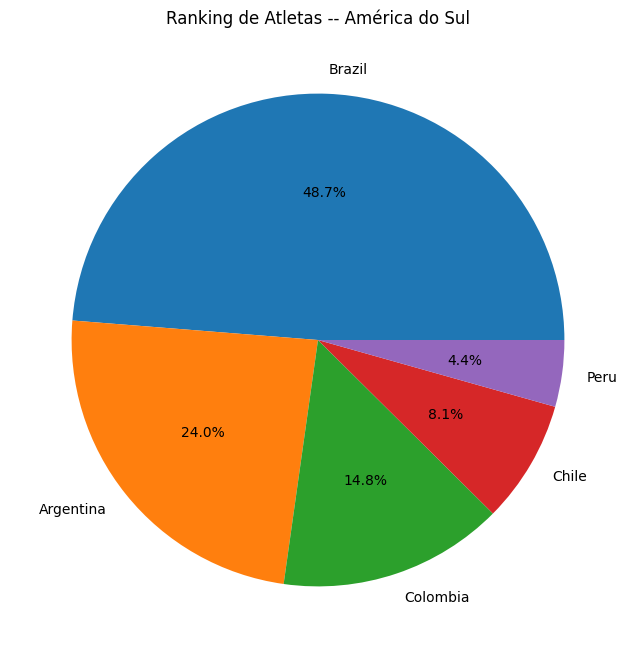

In [36]:
# Atletas Sul-Americanos
paises_incluidos = ['Brazil', 'Argentina', 'Colombia', 'Chile', 'Peru']
df_filtrado = df[df['país'].isin(paises_incluidos)]
plt.figure(figsize=(8, 8))
plt.pie(df_filtrado['país'].value_counts(),
        labels=df_filtrado['país'].value_counts().index,
        autopct='%1.1f%%')

plt.title('Ranking de Atletas -- América do Sul')
plt.show()

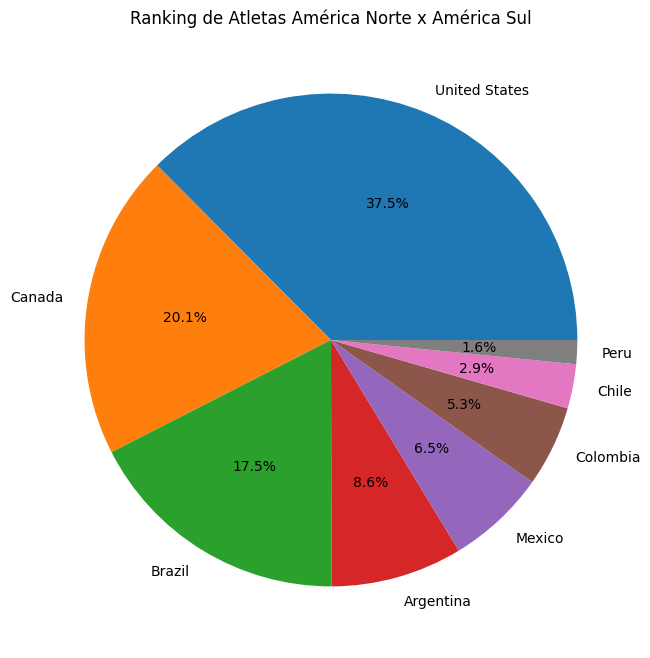

In [41]:
# Comparativo de qtd atletas América do Norte x América do Sul
paises_incluidos = ['United States', 'Canada', 'Mexico', 'Brazil', 'Argentina', 'Colombia', 'Chile', 'Peru']
df_filtrado = df[df['país'].isin(paises_incluidos)]
plt.figure(figsize=(8, 8))
plt.pie(df_filtrado['país'].value_counts(),
        labels=df_filtrado['país'].value_counts().index,
        autopct='%1.1f%%')

plt.title('Ranking de Atletas América Norte x América Sul')
plt.show()


In [ ]:
# filtrando alguns dados
df[["nome_curto", "código_país", "país", "gênero", "eventos"]]

,nome_curto,código_país,país,gênero,eventos
0,VALENCIA A,MEX,Mexico,Female,"[""Women's Individual"", ""Women's Team"", 'Mixed ..."
1,RUIZ A,MEX,Mexico,Female,"[""Women's Individual"", ""Women's Team""]"
2,GRANDE M,MEX,Mexico,Male,"[""Men's Individual"", ""Men's Team"", 'Mixed Team']"
3,ROJAS C,MEX,Mexico,Male,"[""Men's Individual"", ""Men's Team""]"
4,MARTINEZ WING B,MEX,Mexico,Male,"[""Men's Individual"", ""Men's Team""]"
...,...,...,...,...,...
11110,SULEYMANOV S,AZE,Azerbaijan,Male,"[""Men's Greco-Roman 77kg""]"
11111,MAGOMEDOV M,AZE,Azerbaijan,Male,"[""Men's Freestyle 97kg""]"
11112,SACULTAN M,MDA,Republic of Moldova,Male,"[""Men's Freestyle 65kg""]"
11113,VALIEV C,ALB,Albania,Male,"[""Men's Freestyle 74kg""]"


In [ ]:
df.describe()

,código,altura,peso
count,1.111500e+04,11115.000000,11099.000000
mean,1.887426e+06,81.835178,2.213713
std,3.587687e+05,89.504711,13.114771
min,1.532872e+06,0.000000,0.000000
25%,1.888186e+06,0.000000,0.000000
50%,1.918842e+06,0.000000,0.000000
75%,1.948950e+06,177.000000,0.000000
max,9.460001e+06,222.000000,113.000000


In [43]:
# lendo a base do ranking de medalhas

df_medalhas = pd.read_csv('/content/olympics2024.csv')
df_medalhas.head()

,Rank,Country,Country Code,Gold,Silver,Bronze,Total
0,1,United States,US,40,44,42,126
1,2,China,CHN,40,27,24,91
2,3,Japan,JPN,20,12,13,45
3,4,Australia,AUS,18,19,16,53
4,5,France,FRA,16,26,22,64


In [44]:
# informacoes da base de ranking medalhas

df_medalhas.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Rank          91 non-null     int64 
 1   Country       91 non-null     object
 2   Country Code  91 non-null     object
 3   Gold          91 non-null     int64 
 4   Silver        91 non-null     int64 
 5   Bronze        91 non-null     int64 
 6   Total         91 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 5.1+ KB


In [45]:
# descrição do arquivo

df_medalhas.describe()

,Rank,Gold,Silver,Bronze,Total
count,91.000000,91.000000,91.000000,91.000000,91.000000
mean,45.307692,3.604396,3.593407,4.219780,11.417582
std,25.652244,6.990278,6.770816,6.558798,19.702829
min,1.000000,0.000000,0.000000,0.000000,1.000000
25%,23.500000,0.000000,0.000000,1.000000,2.000000
50%,44.000000,1.000000,1.000000,2.000000,5.000000
75%,68.000000,3.000000,3.000000,5.000000,9.000000
max,84.000000,40.000000,44.000000,42.000000,126.000000


In [46]:
# detalhe das colunas

print(df_medalhas.columns)

Index(['Rank', 'Country', 'Country Code', 'Gold', 'Silver', 'Bronze', 'Total'], dtype='object')


In [47]:
# tradução das colunas para portugues

traducao = {
    'Rank': 'Ranking',
    'Country': 'País',
    'Country Code': 'Código do País',
    'Gold': 'Ouro',
    'Silver': 'Prata',
    'Bronze': 'Bronze',
    'Total': 'Total'
}

df_medalhas.rename(columns=traducao, inplace=True)

print(df_medalhas.columns)
df_medalhas.head()


Index(['Ranking', 'País', 'Código do País', 'Ouro', 'Prata', 'Bronze',
       'Total'],
      dtype='object')


,Ranking,País,Código do País,Ouro,Prata,Bronze,Total
0,1,United States,US,40,44,42,126
1,2,China,CHN,40,27,24,91
2,3,Japan,JPN,20,12,13,45
3,4,Australia,AUS,18,19,16,53
4,5,France,FRA,16,26,22,64


In [ ]:
# encontrando a posição do Brasil

#df_medalhas[df_medalhas['País'] == 'Brazil']
print(df_medalhas[df_medalhas['País'] == 'Brazil'])

    Ranking    País Código do País  Ouro  Prata  Bronze  Total
19       20  Brazil            BRZ     3      7      10     20


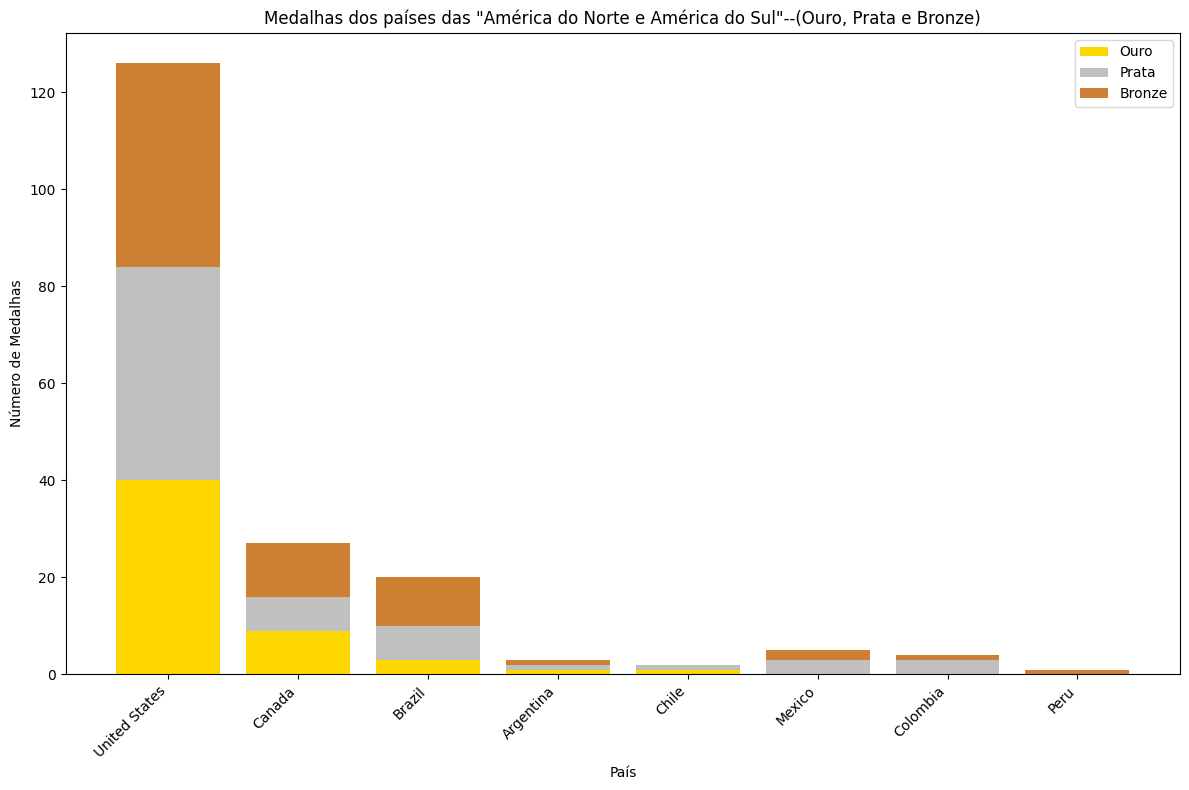

In [48]:
#Comparativo de medalhas entre América do Norte x América do Sul
paises_listados = ['United States', 'Canada', 'Mexico', 'Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Equador', 'Guiana', 'Paraguai', 'Peru', 'Suriname', 'Uruguai', 'Venezuela']
df_filtro = df_medalhas[df_medalhas['País'].isin(paises_listados)]

plt.figure(figsize=(12, 8))
plt.bar(df_filtro['País'], df_filtro['Ouro'], color='gold', label='Ouro')
plt.bar(df_filtro['País'], df_filtro['Prata'], color='silver', label='Prata', bottom=df_filtro['Ouro'])
plt.bar(df_filtro['País'], df_filtro['Bronze'], color='#cd7f32', label='Bronze', bottom=df_filtro['Ouro'] + df_filtro['Prata'])

plt.xlabel('País')
plt.ylabel('Número de Medalhas')
plt.title('Medalhas dos países das "América do Norte e América do Sul"--(Ouro, Prata e Bronze)')

plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

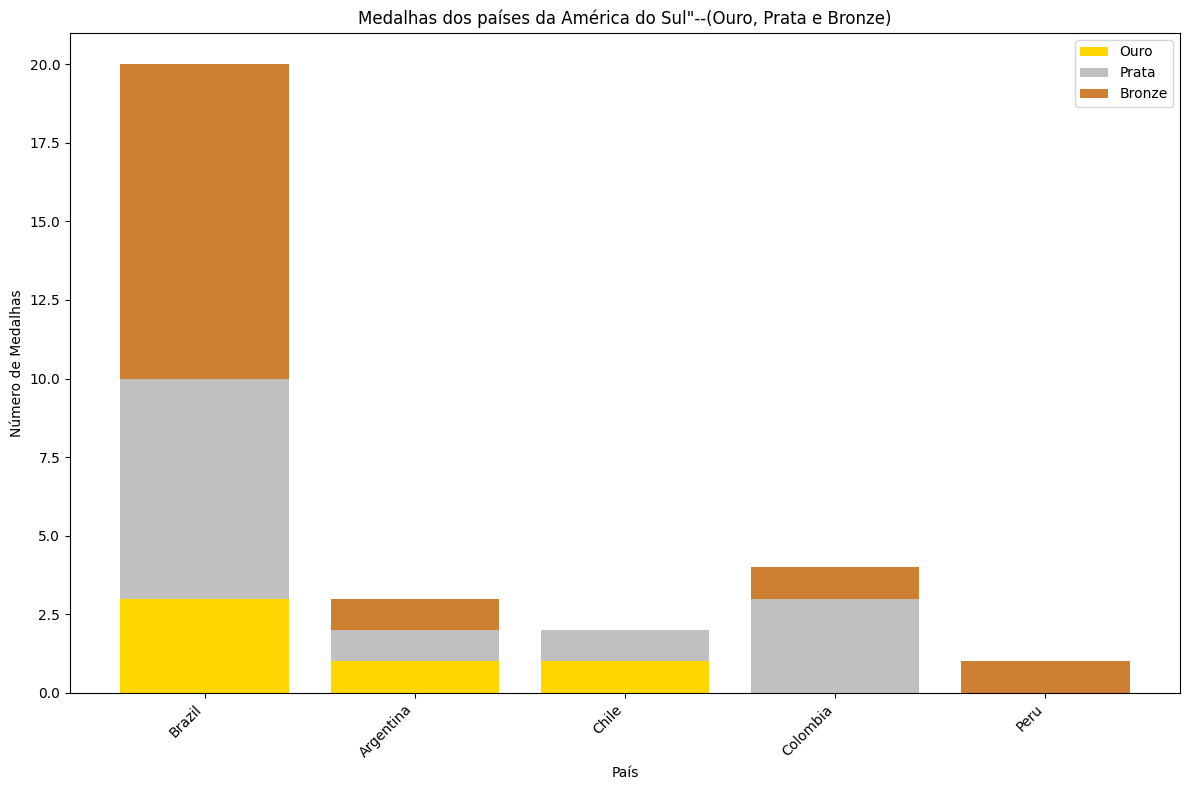

In [50]:
#Comparativo de medalhas entre América do Sul
paises_listados = ['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia', 'Equador', 'Paraguai', 'Peru', 'Uruguai', 'Venezuela']
df_filtro = df_medalhas[df_medalhas['País'].isin(paises_listados)]

plt.figure(figsize=(12, 8))
plt.bar(df_filtro['País'], df_filtro['Ouro'], color='gold', label='Ouro')
plt.bar(df_filtro['País'], df_filtro['Prata'], color='silver', label='Prata', bottom=df_filtro['Ouro'])
plt.bar(df_filtro['País'], df_filtro['Bronze'], color='#cd7f32', label='Bronze', bottom=df_filtro['Ouro'] + df_filtro['Prata'])

plt.xlabel('País')
plt.ylabel('Número de Medalhas')
plt.title('Medalhas dos países da América do Sul"--(Ouro, Prata e Bronze)')

plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()